In [ ]:
# Description: This is a sentiment analysis program that parses the dataset of tweets fetched from Twitter using python

In [ ]:
import pandas as pd
import numpy as np
from string import punctuation
import re
import nltk
from nltk.corpus import twitter_samples
import random
nltk.download('stopwords')
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load the Data
from google.colab import files
uploaded=files.upload()

Saving Twitter_Data.csv to Twitter_Data.csv


In [ ]:
tweets=pd.read_csv("Twitter_Data.csv")

In [ ]:
#'0' denotes tweet is Neutral, '1' denotes tweet is positive, '-1' denotes tweet is negative
tweets.head(10)

In [ ]:
# Data type info
tweets['clean_text']=tweets['clean_text'].astype('str')
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162980 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
##Dropping Nan Values
tweets=tweets.dropna()

In [ ]:
##Data Visualization
all_positive_tweets=tweets[tweets['category']==1]['clean_text']
all_neutral_tweets=tweets[tweets['category']==0]['clean_text']
all_negative_tweets=tweets[tweets['category']==-1]['clean_text']

In [ ]:
##Interpreting nature of tweet with length of the tweet
total_positive_words = []
for sentence in all_positive_tweets:
    total_positive_words.append(sentence.count(' '))

total_negative_words = []
for sentence in all_negative_tweets:
    total_negative_words.append(sentence.count(' '))

total_neutral_words = []
for sentence in all_neutral_tweets:
    total_neutral_words.append(sentence.count(' '))

import plotly.graph_objects as go
import numpy as np

x0 = np.array(total_positive_words)
x1 = np.array(total_negative_words)
x2 = np.array(total_neutral_words)

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, name = 'Positive'))
fig.add_trace(go.Histogram(x=x2, name = 'Neutral'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
total_negative_words = []
for sentence in all_negative_tweets:
    total_negative_words.append(sentence.count(' '))

total_neutral_words = []
for sentence in all_neutral_tweets:
    total_neutral_words.append(sentence.count(' '))

import plotly.graph_objects as go
import numpy as np

x0 = np.array(total_positive_words)
x1 = np.array(total_negative_words)
x2 = np.array(total_neutral_words)

fig = go.Figure()
fig.add_trace(go.Histogram(x=x1, name = 'Negative'))
fig.add_trace(go.Histogram(x=x2, name = 'Neutral'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
total_positive_words = []
for sentence in all_positive_tweets:
    total_positive_words.append(sentence.count(' '))

total_negative_words = []
for sentence in all_negative_tweets:
    total_negative_words.append(sentence.count(' '))

total_neutral_words = []
for sentence in all_neutral_tweets:
    total_neutral_words.append(sentence.count(' '))

import plotly.graph_objects as go
import numpy as np

x0 = np.array(total_positive_words)
x1 = np.array(total_negative_words)
x2 = np.array(total_neutral_words)

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, name = 'Positive'))
fig.add_trace(go.Histogram(x=x1, name = 'Negative'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

<Axes: xlabel='category', ylabel='count'>

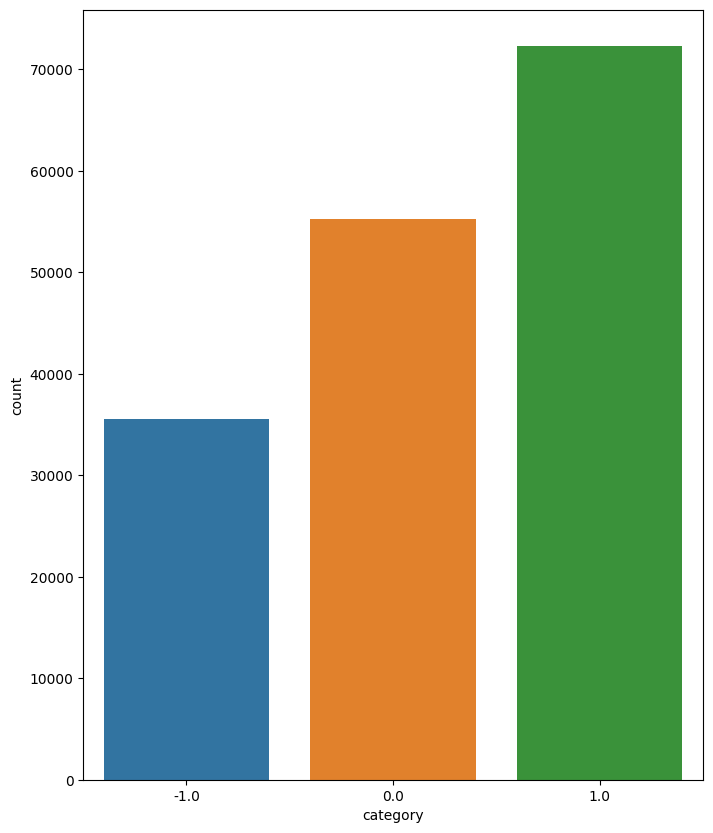

In [ ]:
plt.figure(figsize=(8,10))
sns.countplot(x=tweets['category'])

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
positive_wc = wc.generate(tweets[tweets['category'] == 1.0]['clean_text'].str.cat(sep = " "))
neutral_wc = wc.generate(tweets[tweets['category'] == 0.0]['clean_text'].str.cat(sep = " "))
negative_wc = wc.generate(tweets[tweets['category'] == -1.0]['clean_text'].str.cat(sep = " "))

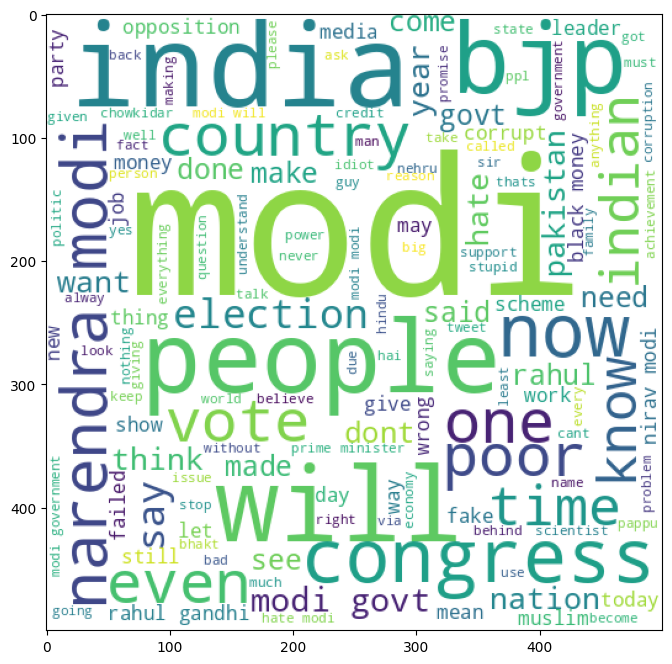

In [ ]:
plt.figure(figsize = (10, 8))
plt.imshow(positive_wc)

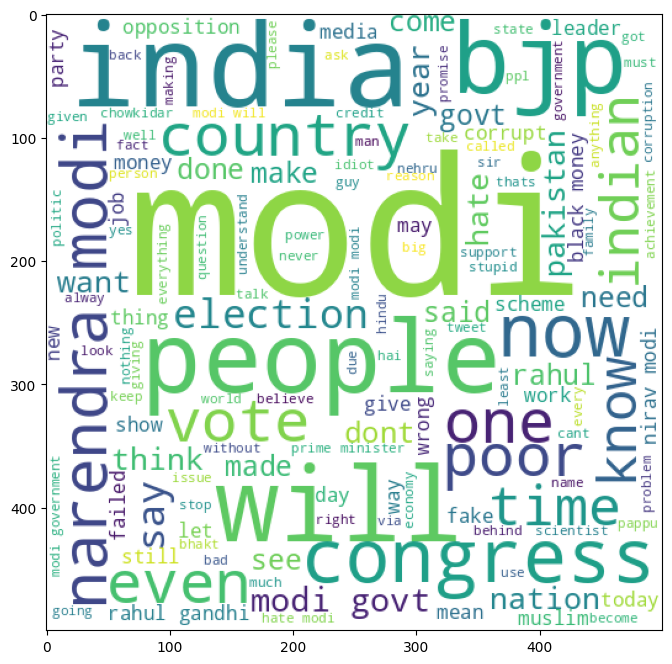

In [ ]:
plt.figure(figsize = (10, 8))
plt.imshow(neutral_wc)

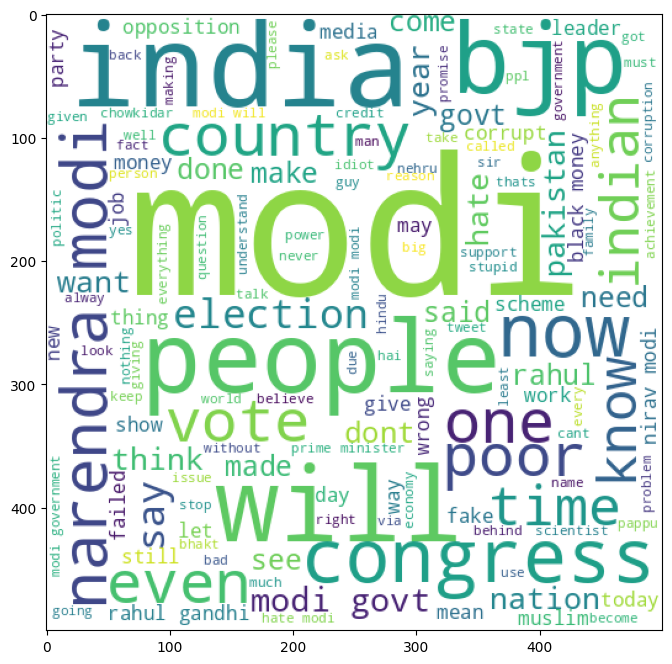

In [ ]:
plt.figure(figsize = (10, 8))
plt.imshow(negative_wc)

In [ ]:
tweets.isnull().sum()

clean_text    0
category      0
dtype: int64

In [ ]:
#Removing stopwords and punctuations
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [ ]:
tweets=tweets.dropna(axis=0)

In [ ]:
tweets.isnull().sum()

clean_text    0
category      0
dtype: int64

In [ ]:
# Removing Stopwords
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_english)]))

In [ ]:
tweets.head()

,clean_text,category
0,modi promised “minimum government maximum gove...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporters prefix chowkidar names modi ...,1.0
4,answer among powerful world leader today trump...,1.0


In [ ]:
# removing punctuations
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
tweets.head()

,clean_text,category
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporters prefix chowkidar names modi ...,1.0
4,answer among powerful world leader today trump...,1.0


In [ ]:
#Stemming the words means narrow down into single common word
stemmer = PorterStemmer()
def stemming(word):
    list1=[]
    for i in word.split():
        list1.append(stemmer.stem(i))
    return ' '.join(list1)

tweets['clean_text'] = tweets['clean_text'].apply(lambda x:stemming(x))

In [ ]:
tweets['category'] = [2 if x == -1 else x for x in tweets['category']]

In [ ]:
tweets_2=tweets.copy()

In [ ]:
tweets.head()

,clean_text,category
0,modi promis minimum govern maximum govern expe...,2.0
1,talk nonsens continu drama vote modi,0.0
2,say vote modi welcom bjp told rahul main campa...,1.0
3,ask support prefix chowkidar name modi great s...,1.0
4,answer among power world leader today trump pu...,1.0


In [ ]:
#Tokenizing the words means split the whole sentence into root words called tokens
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets.clean_text)
word_index = tokenizer.word_index

In [ ]:
vocab_size = len(word_index)+1

In [ ]:
tweets.head()

,clean_text,category
0,modi promis minimum govern maximum govern expe...,2.0
1,talk nonsens continu drama vote modi,0.0
2,say vote modi welcom bjp told rahul main campa...,1.0
3,ask support prefix chowkidar name modi great s...,1.0
4,answer among power world leader today trump pu...,1.0


In [ ]:
##Padding the tweets
##padding the tokenized sequences to same length
max_length = 200
lines = pad_sequences(tokenizer.texts_to_sequences(tweets.clean_text),
                        maxlen = max_length)
tweets.clean_text = lines.tolist()

tweets.category.value_counts()

tweets.head()

tweets.isnull().sum()


clean_text    0
category      0
dtype: int64

In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(tweets['clean_text'],tweets['category'],test_size=0.2,random_state=101)
X_train = np.vstack(X_train.values)
y_train = np.vstack(y_train.values)

X_val = np.vstack(X_test.values)
y_val = np.vstack(y_test.values)

In [ ]:
tweets.head()

,clean_text,category
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0


In [ ]:
##Sequential Modelling
model = tf.keras.Sequential()

#Input layer
model.add(Input(shape=(None,)))

#Embedding layer
model.add(Embedding(input_dim=vocab_size,output_dim=200,trainable=True))

#LSTM layer
model.add(LSTM(64, activation='relu'))

#Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

#Output layer
model.add(Dense(3, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 200)         17711000  
                                                                 
 lstm_5 (LSTM)               (None, 64)                67840     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 3)                 195       
                                                                 
Total params: 17,783,195
Trainable params: 17,783,195
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    epochs=2, batch_size=512,
                    verbose=1,shuffle=True,validation_data=(X_val,y_val))

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?



255/255 [==============================] - 553s 2s/step - loss: 0.6858 - accuracy: 0.7136 - val_loss: 0.4253 - val_accuracy: 0.8513
Epoch 2/2
255/255 [==============================] - 550s 2s/step - loss: 0.3627 - accuracy: 0.8744 - val_loss: 0.4111 - val_accuracy: 0.8517


In [ ]:
predictions = model.predict(X_val)
print(history.history)

1019/1019 [==============================] - 72s 70ms/step
{'loss': [0.6857839822769165, 0.36274582147598267], 'accuracy': [0.7135559916496277, 0.8744266629219055], 'val_loss': [0.4252941310405731, 0.4111138582229614], 'val_accuracy': [0.8512961864471436, 0.8516643643379211]}


In [ ]:
print("Evaluate on test data")
results = model.evaluate(X_val, y_val, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
255/255 [==============================] - 44s 171ms/step - loss: 0.4111 - accuracy: 0.8517
test loss, test acc: [0.4111139476299286, 0.8516643643379211]
